In [111]:
#Select and Prepare dataset

In [123]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [124]:
#loading the data using pandas library into a data variable
data_Frame = pd.read_csv('dataset1_test.csv')
no_of_examplePoints = data_Frame.shape[0]   #no of rows
no_of_features = data_Frame.shape[1]        #no of cols
print("Total number of Example Points:", no_of_examplePoints)
print("Total number of features:", no_of_features)

Total number of Example Points: 296
Total number of features: 10


In [125]:
X = data_Frame.drop('Runs', axis=1)  # Dropping the 'Runs' column to create the input features
y = data_Frame['Runs']  # Assigning the 'Runs' column as the target variable
# Printing the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (296, 9)
Shape of y: (296,)


In [126]:
data_Frame.head()  #first 5 rows of data

,Batsman,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns
0,1,33,78.0,56,5,0,58.92,3,caught,2
1,1,33,77.0,49,6,0,67.34,3,caught,4
2,1,215,503.0,346,25,1,62.13,3,lbw,1
3,1,58,67.0,48,9,0,120.83,3,bowled,3
4,1,7,26.0,18,1,0,38.88,3,caught,1


In [127]:
#data Preprocessing  ( Checking Null_Values)
# Checking for null values
null_values = data_Frame.isnull().sum()
# Displaying columns with null values
print(null_values[null_values > 0])
# Replacing null values in 'Minutes' column with a specific value
specific_value = data_Frame['Mins'].mean()  # Replace with the desired value
data_Frame['Mins'].fillna(specific_value, inplace=True)
# Verifying if null values have been replaced
print(data_Frame.isnull().sum())

Mins    4
dtype: int64
Batsman      0
Runs         0
Mins         0
BF           0
4s           0
6s           0
SR           0
Pos          0
Dismissal    0
Inns         0
dtype: int64


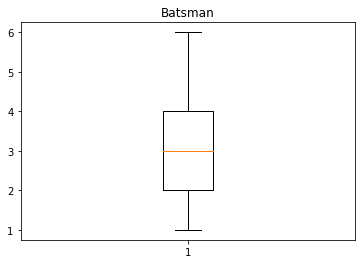

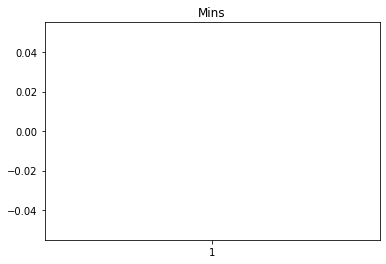

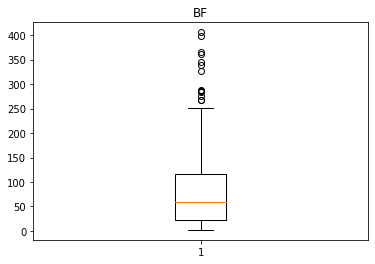

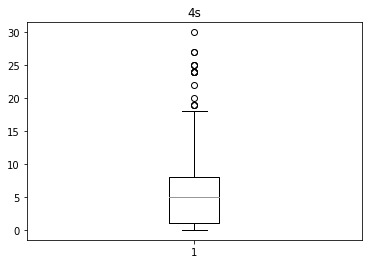

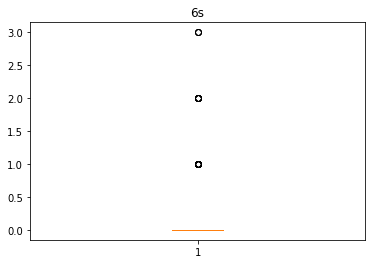

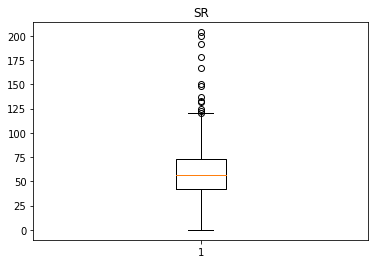

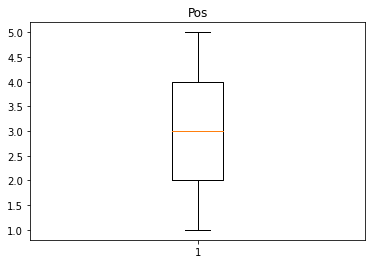

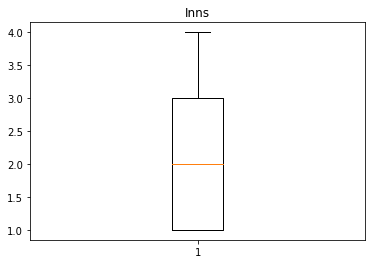

In [128]:
#data Preprocessing ( Checking Outliers)
# Create boxplots for each input feature
for feature in X.columns:
    if feature != 'Dismissal':
        plt.figure()
        plt.boxplot(X[feature])
        plt.title(feature)
        plt.show()


In [120]:
#Defining the function to remove outliers using IQR method
def remove_outliers_iqr(data, threshold=1.5):
    #Calculating the first quartile (Q1) and third quartile (Q3)
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    #Calculating the IQR (Interquartile Range)
    iqr = q3 - q1
    #Defining the lower and upper bounds for outlier detection
    lower_bound = q1 - (threshold * iqr)
    upper_bound = q3 + (threshold * iqr)
    #Removing the outliers from the data
    data_clean = data[(data >= lower_bound) & (data <= upper_bound)]
    return data_clean
#Listing of features with outliers
features_with_outliers = ['BF', '4s', '6s', 'SR']
#Creating a copy of the DataFrame
cleaned_df = data_Frame.copy()
#Removing outliers for each feature
for feature in features_with_outliers:
    cleaned_df[feature] = remove_outliers_iqr(cleaned_df[feature])
# Save the cleansed dataset to a new CSV file
cleaned_df.to_csv('cleansed_dataset.csv', index=False)